In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
train = pd.read_csv("data/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
train.duplicated().sum()

np.int64(0)

In [8]:
tarin = train.dropna()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
test = pd.read_csv("data/test.csv")

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [12]:
train.duplicated().sum()

np.int64(0)

In [13]:
X = train.drop("label", axis=1).values
y = train['label'].values

In [14]:
X = X/255.0
test = test.values / 255.0

In [15]:
X = X.reshape(-1, 28, 28, 1)
test = test.reshape(-1, 28, 28, 1)

In [16]:
y = to_categorical(y,10)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.1)

In [18]:
model = tf.keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64)

Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.7961 - loss: 0.6304 - val_accuracy: 0.9688 - val_loss: 0.1036
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9643 - loss: 0.1190 - val_accuracy: 0.9826 - val_loss: 0.0624
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9754 - loss: 0.0847 - val_accuracy: 0.9869 - val_loss: 0.0470
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9800 - loss: 0.0660 - val_accuracy: 0.9857 - val_loss: 0.0479
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9850 - loss: 0.0489 - val_accuracy: 0.9881 - val_loss: 0.0409
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9890 - val_loss: 0.0400
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.9893 - val_loss: 0.0381
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9886 - loss: 0.0326 - 

In [20]:
# Evaluate the model on the validation set
print("Evaluating model on validation data...")
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Evaluating model on validation data...
Validation Loss: 0.0369
Validation Accuracy: 0.9890


In [21]:
# Make predictions on the test set
print("Making predictions on test data...")
predictions = model.predict(test)

Making predictions on test data...
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [22]:
# Convert predictions from one-hot encoded probabilities to class labels
# np.argmax finds the index of the maximum probability, which is the predicted digit
predicted_classes = np.argmax(predictions, axis=1)
print("First 5 predicted classes:", predicted_classes[:5])

First 5 predicted classes: [2 0 9 9 3]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


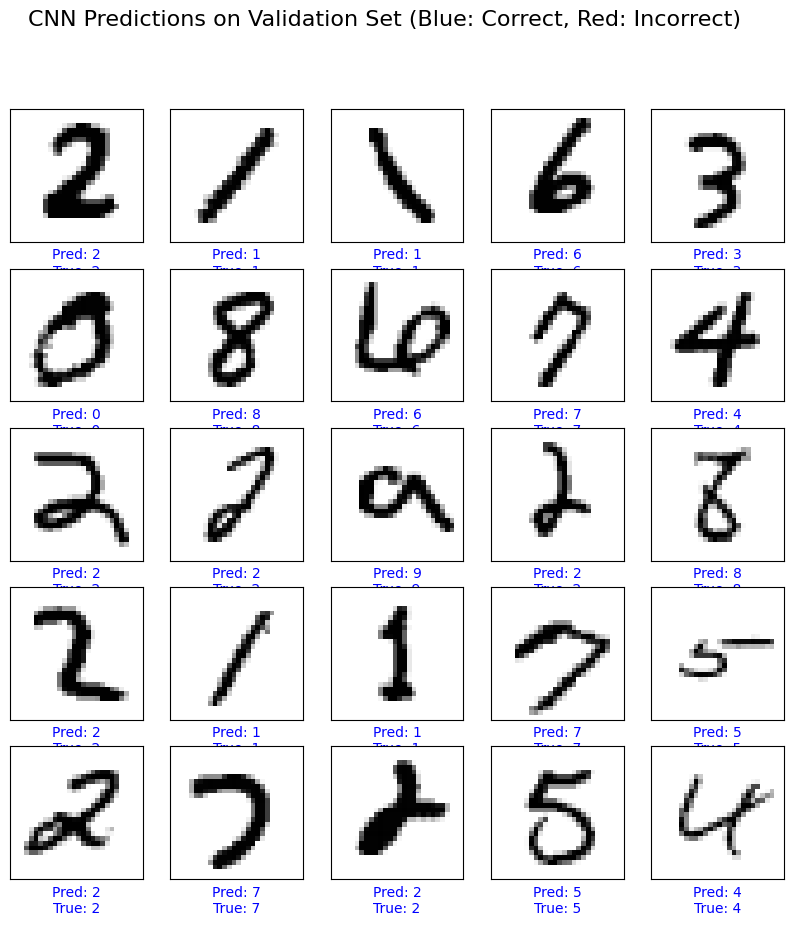

In [23]:
# Use the validation set for visualization since we have the true labels (y_val)
num_images = 25

# 1. Select the first 25 samples from the validation set
sample_images = X_val[:num_images]
sample_true_labels = np.argmax(y_val[:num_images], axis=1)

# 2. Make predictions on the sample images
sample_predictions = model.predict(sample_images)
sample_predicted_labels = np.argmax(sample_predictions, axis=1)

# 3. Setup the plot
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Reshape the 28x28x1 image to 28x28 for plotting
    plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.binary)

    # Set color based on whether the prediction is correct
    true_label = sample_true_labels[i]
    pred_label = sample_predicted_labels[i]

    if pred_label == true_label:
        color = 'blue'  # Correct prediction
    else:
        color = 'red'   # Incorrect prediction

    plt.xlabel(f"Pred: {pred_label}\nTrue: {true_label}", color=color)

plt.suptitle("CNN Predictions on Validation Set (Blue: Correct, Red: Incorrect)", fontsize=16)
plt.show()

In [25]:
model.save("cnn_model.h5")